# ML-3 Обучение с учителем. Классификация
###  Содержание <a class="anchor" id=0></a>
- [1. Введение](#1)
- [2. Логическая регрессия](#2)
- [2.2 Поиск параметров логической регрессии](#2-2)
- [3. Метрики классификации. Мультиклассовая классификация](#3)
- [3.1 Расчёт метрик на python](#3-1)
- [3.2 Мультиклассовая классификация](#3-2)
- [3.3 Мультиклассовая классификация на python](#3-3)
- [4. Логическия регрессия. Практика](#4)
- [5. Деревья решений](#5)
- [5.1 Процесс построения дерева решений](#5-1)
- [5.2 Деревья решений в sklearn](#5-2)
- [6. Введение в ансамбли: бэггинг. Случайные лес](#6)
- [7. Деревья решений и случайный лес. Практика](#7)
- [8. Итоги](#8)

# 1. Введение <a class="anchor" id=1></a>

[к содержанию](#0)

# 2. Логическая регрессия <a class="anchor" id=2></a>

[к содержанию](#0)

Что вообще означает `«решить задачу классификации»`? Это значит **построить разделяющую поверхность в пространстве признаков**, которая делит пространство на части, каждая из которых соответствует определённому классу. 

Ниже представлены примеры разделяющих поверхностей, которые производят бинарную классификацию. Красным и синим цветом обозначены классы, зелёным — собственно поверхность, которая делит пространство признаков на две части. В каждой из этих частей находятся только наблюдения определённого класса.

<img src=ml3_img1.png>

Модели, которые решают задачу классификации, называются классификаторами (`classifier`).

Если взять в качестве разделяющей поверхности некоторую плоскость (ровная поверхность на первом рисунке), то мы получаем модель логистической регрессии, которая тесно связана с рассмотренной нами ранее линейной регрессией.

Давайте для начала вспомним, как выглядит уравнение модели линейной регрессии в общем случае:

<img src=ml3_img2.png>

>Но всё это работает только в том случае, когда целевой признак `y`, который мы хотим предсказать, является числовым, например цена, вес, время аренды и т. д.

Что же делать с этой моделью, когда целевой признак `y` является категориальным? Например, является письмо спамом или обычным письмом?

Можно предположить, что, раз у нас есть две категории, мы можем обозначить категории за `y = 1` (Спам) и `y = 0` (Не спам) и обучить линейную регрессию предсказывать `0` и `1`.

Но результат будет очень плохим. Выглядеть это будет примерно так:

<img src=ml3_img3.png>

Для больших значений `x` прямая будет выдавать значения **больше 1**, а для очень маленьких — **меньше 0**. Что это значит? Непонятно. Непонятно и то, что делать со значениями в диапазоне от 0 до 1. Да, можно относить значения на прямой выше 0.5 к классу 1, а меньше либо равным 0.5 — к классу 0, но это всё «костыли».

>Идея! Давайте переведём задачу классификации в задачу регрессии. Вместо предсказания класса будем предсказывать вероятность принадлежности к этому классу. 

Модель должна выдавать некоторую вероятность `P`, которая будет определять, принадлежит ли данный объект к классу 1: например, вероятность того, что письмо является спамом. При этом вероятность того, что письмо является обычным письмом (класс 0), определяется как `Q = 1 - P`.  

Когда модель будет обучена на предсказание вероятности, мы зададим некоторый порог вероятности. Если предсказанная вероятность будет выше этого порога, мы определим объект к классу 1, а если ниже — к классу 0.

Например, стандартный порог равен `0.5`. То есть если вероятность `P > 0.5`, мы будем считать письмо спамом, а если `P <= 0.5` — обычным информативным письмом.

В итоге мы добьёмся того, что будем предсказывать не дискретный категориальный, а непрерывный числовой признак, который лежит в диапазоне `[0, 1]`. А это уже знакомая нам задача регрессии.

>Однако остался главный вопрос: как научить модель предсказывать вероятности, ведь они должны лежать строго в диапазоне от 0 до 1, а предсказания линейной регрессии лежат в диапазоне от `-inf` до `+inf`? 

Тут-то мы и приходим к модели логистической регрессии — **регрессии вероятностей**.

## ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

Логистическая регрессия (`Logistic Regression`) — одна из простейших моделей для решения задачи классификации. Несмотря на простоту, модель входит в топ часто используемых алгоритмов классификации в `Data Science`.

В основе логистической регрессии лежит логистическая функция (`logistic function`) `sigma` — отсюда и название модели. Однако более распространённое название этой функции — сигмόида (`sigmoid`). Записывается она следующим образом:

<img src=ml3_img4.png>

<img src=ml3_img5.png>

<img src=ml3_img6.png>

## Чего мы добились таким преобразованием?

Если мы обучим модель, то есть подберём  коэффициенты `w0, w1,... , w_m` (как их найти, обсудим чуть позже) таким образом, что для объектов класса 1 модель линейной регрессии начнёт выдавать положительное число, а для класса 0 — выдавать отрицательное число, то тогда, подставив предсказание линейной регрессии `z` в сигмоиду, мы сможем получать вероятности принадлежности к каждому из классов в диапазоне от `0` до `1`.

Далее по порогу вероятности мы сможем определять, к какому классу принадлежит объект.

Это и есть наша цель. Мы свели задачу классификации к задаче регрессии для предсказания вероятностей. 

Для бинарной классификации описанное выше будет выглядеть следующим образом:

<img src=ml3_img7.png>

<img src=ml3_img8.png>



## Разберёмся с геометрией

Возьмём частный случай, когда класс объекта зависит от двух признаков — `x1` и `x2`.

## Рассмотрим пример.

Мы пытаемся предсказать поступление студента в университет в зависимости от результатов двух экзаменов. Целевой признак  — результат поступления в аспирантуру (admission outcome) с двумя возможными значениями: поступил или не поступил. Факторы: `x1` — результат сдачи первого экзамена (Exam1 Score) и `x2` — результат сдачи второго (Exam 2 Score). Будем предсказывать вероятность поступления с помощью логистической регрессии.

Изобразим зависимость в пространстве двух факторов (вид сверху) в виде диаграммы рассеяния, а целевой признак отобразим в виде точек (непоступившие) и крестиков (поступившие).

Если рассматривать уравнение линейной регрессии отдельно от сигмоиды, то геометрически построить логистическую регрессию на основе двух факторов — значит найти такие коэффициенты `w0`, `w1` и `w2` уравнения плоскости, при которых наблюдается наилучшее разделение пространства на две части.

`z = w0 + w1*x1 + w2*x2`

Тогда выражение для `z` будет задавать в таком пространстве плоскость (в проекции вида сверху — прямую), которая разделяет всё пространство на две части. Над прямой вероятность поступления будет `>0.5`, а под прямой `<0.5`:

<img src=ml3_img9.png>

## В чём математический секрет?

Математически подстановка в уравнение плоскости точки, которая не принадлежит ей (находится ниже или выше), означает вычисление расстояния от этой точки до плоскости.

* Если точка находится ниже плоскости, расстояние будет отрицательным `z < 0`.
* Если точка находится выше плоскости, расстояние будет положительным `z > 0`.
* Если точка находится на самой плоскости, `z = 0`.

Мы знаем, что подстановка отрицательных чисел в сигмоиду приведёт к вероятности `P < 0.5`, а постановка положительных — к вероятности `P > 0.5`. 

>Таким образом, ключевым моментом в предсказании логистической регрессии является расстояние от точки до разделяющей плоскости в пространстве факторов. Это расстояние в литературе часто называется **отступом** (`margin`). 

В этом и состоит секрет работы логистической регрессии.

>Чем больше расстояние от точки, находящейся выше разделяющей плоскости, до самой плоскости, тем больше оценка вероятности принадлежности к классу 1.

Попробуйте подставить различные координаты точек в модель логистической регрессии и убедитесь в этом.

Можно построить тепловую карту, которая показывает, чему равны вероятности в каждой точке пространства:

<img src=ml3_img10.png>

>На рисунке точки, которые относятся к классу непоступивших абитуриентов, лежащие ниже разделяющей плоскости, находятся в красной зоне. Чем насыщеннее красный цвет, тем ниже вероятность того, что абитуриент поступит в аспирантуру. И наоборот, точки, которые относятся к классу поступивших абитуриентов, лежащие выше разделяющей плоскости, находятся в синей зоне. Чем насыщеннее синий цвет, тем выше вероятность того, что абитуриент поступит в аспирантуру.

<img src=ml3_img11.png>

<img src=ml3_img12.png>

# ПОИСК ПАРАМЕТРОВ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ <a class="anchor" id=2-2></a>

[к содержанию](#0)

Итак, мы разобрались с тем, как выглядит модель логистической регрессии и что она означает в геометрическом смысле.

>Но остался один главный вопрос: как найти такие коэффициенты `w = (w0, w1,... ,w_m)` , чтобы гиперплоскость разделяла пространство наилучшим образом?

Вновь обратимся к нашей схеме минимизации эмпирического риска:

<img src=ml3_img13.png width=800>

Можно предположить, что стоит использовать метод наименьших квадратов. Введём функцию ошибки — средний квадрат разности `MSE` между истинными классами `y` и предсказанными классами `y_` и попытаемся его минимизировать.

Сразу можно достоверно предсказать, что результат такого решения будет плохим, поэтому воздержимся от его использования.

Здесь нужен другой подход. Это **метод максимального правдоподобия** (`Maximum Likelihood Estimation — MLE`). 

>**Правдоподобие** — это оценка того, насколько вероятно получить истинное значение целевой переменной `y` при данных `x` и параметрах `w`. 

Данный метод позволяет получить функцию правдоподобия.

>Цель метода — найти такие параметры `w = (w0, w1,... ,w_m)`, в которых наблюдается максимум функции правдоподобия. Подробнее о выводе формулы вы можете прочитать здесь.

А мы пока что опустим математические детали метода и приведём только конечную формулу:

<img src=ml3_img14.png>
<img src=ml3_img15.png>

**Примечание**. К сожалению, функция `likelihood` не имеет интерпретации, то есть нельзя сказать, что значит число `2.34` в контексте правдоподобия.

## Цель — найти такие параметры, при которых наблюдается максимум этой функции.

Теперь пора снова применить магию математики, чтобы привести задачу к привычному нам формату минимизации эмпирического риска. По правилам оптимизации, если поставить перед функцией минус, то задача оптимизации меняется на противоположную: был поиск максимума — станет поиском минимума.

Таким образом мы получим функцию потерь `L(w)`, которая носит название «**функция логистических потерь**», или `logloss`. Также часто можно встретить название кросс-энтропия, или `cross-entropy` `loss`:

<img src=ml3_img16.png>

Математическую реализацию вычисления градиента для `logloss` мы обсудим далее в курсе, а пока нас интересует исключительно его смысл.

Мы уже знаем, что для того, чтобы повысить шанс пройти мимо локальных минимумов функции потерь, используется не сам градиентный спуск, а его модификации: например, можно использовать уже знакомый нам стохастический градиентный спуск (`SGD`).

Помним, что применение градиентного спуска требует предварительного масштабирования данных (стандартизации/нормализации). В реализации логистической регрессии в `sklearn` предусмотрено ещё несколько методов оптимизации, для которых масштабирование не обязательно. О них мы упомянём в практической части модуля.

Во избежание переобучения модели в функцию потерь логистической регрессии традиционно добавляется **регуляризация**. В реализации логистической регрессии в `sklearn` она немного отличается от той, что мы видели ранее для линейной регрессии.

<img src=ml3_img17.png>

# В этом месте можно полистать ноутбук `Classification.LogisticRegression.ipynb`

## Основные параметры `LogisticRegression`

* `random_state` — число, на основе которого происходит генерация случайных чисел.
* `penalty` — метод регуляризации. Возможные значения:
* * `'l1'` — L1-регуляризация;
* * `'l2'` — L2-регуляризация (используется по умолчанию);
* * `'elasticnet'` — эластичная сетка (L1+L2);
* *  `'none'` — отсутствие регуляризации.
* `C` — коэффициент обратный коэффициенту регуляризации, то есть равен `1/alpha`. Чем больше C, тем меньше регуляризация. По умолчанию `C=1`, тогда `α=1`.
* `solver` — численный метод оптимизации функции потерь logloss, может быть:
* *  `'sag'` — стохастический градиентный спуск (нужна стандартизация/нормализация);
* * `'saga'` — [модификация](https://arxiv.org/pdf/1407.0202.pdf) предыдущего, которая поддерживает работу с негладкими функциями (нужна стандартизация/нормализация);
* * `'newton-cg'` — [метод Ньютона](https://docs.scipy.org/doc/scipy/tutorial/optimize.html#newton-conjugate-gradient-algorithm-method-newton-cg) с модификацией сопряжённых градиентов (не нужна стандартизация/нормализация);
* * `'lbfgs'` — [метод Бройдена — Флетчера — Гольдфарба — Шанно](https://ru.wikipedia.org/wiki/Алгоритм_Бройдена_—_Флетчера_—_Гольдфарба_—_Шанно) (не нужна стандартизация/нормализация; используется по умолчанию, так как из всех методов теоретически обеспечивает наилучшую сходимость);
* * `'liblinear'` — [метод покоординатного спуска](http://www.machinelearning.ru/wiki/index.php?title=Метод_покоординатного_спуска) (не нужна стандартизация/нормализация).
* `max_iter` — максимальное количество итераций, выделенных на сходимость.


In [1]:
import pandas as pd

data = pd.read_csv('task_data.zip')
data.head()

,SNo,X_1,X_2,y
0,0,-0.869144,0.389310,0.0
1,1,-0.993467,-0.610591,0.0
2,2,-0.834064,0.239236,0.0
3,3,-0.136471,0.632003,1.0
4,4,0.403887,0.310784,1.0


Обучите модель логистической регрессии для предсказания целевого признака `y`. В качестве алгоритма оптимизации используйте `стохастический градиентный спуск` (масштабировать данные не нужно). В качестве значения параметра `random_state` возьмите число `42`, остальные параметры оставьте по умолчанию.

Воспользуйтесь функцией `plot_probabilities_2d()`, которую мы объявили ранее. Постройте визуализацию разделяющей поверхности.

Сколько объектов класса `0` будут неверно отнесены моделью к классу `1`?

In [2]:
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики

from sklearn.model_selection import train_test_split #сплитование выборки
from sklearn import preprocessing #предобработка

In [3]:
X = data[['X_1', 'X_2']]
y = data['y']

In [5]:
#Создаем объект класса логистическая регрессия
log_reg_2d = linear_model.LogisticRegression(random_state=42, solver='sag')
#Обучаем модель, минизируя logloss
log_reg_2d.fit(X, y)

LogisticRegression(random_state=42, solver='sag')

In [6]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI - от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции - два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец - reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказывает вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаем фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость - линия, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даем графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легену в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

c:\Users\AubakirovMA\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


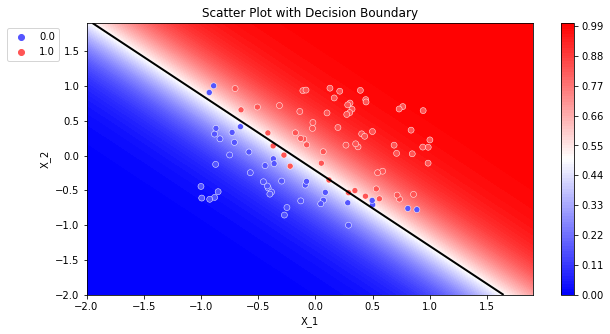

In [7]:
plot_probabilities_2d(X, y, log_reg_2d)

# 3. Метрики классификации. Мультиклассовая классификация <a class="anchor" id=3></a>

[к содержанию](#0)

Будем рассматривать метрики для задачи регрессии на следующем примере. Мы выбрали случайным образом десять пациентов из нашей таблицы и предсказали для них моделью `log_reg_full` ответы:

`y = (1, 2, 1, 1, 2, 1, 1, 2, 1, 1)`

`y_ = (1, 1, 0, 1, 0, 0, 1, 1, 0, 1)`

Все метрики, которые мы рассмотрим, основаны на матрице ошибок. С неё мы и начнём наш разбор.

>Матрица ошибок (`confusion matrix`) показывает все возможные исходы совпадения и несовпадения предсказания модели с действительностью. Используется для расчёта других метрик.

Допустим, у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта одному из классов.

Назовём класс `1` **положительным исходом** (`positive`), а класс `0` — **отрицательным исходом** (`negative`).

Тогда матрица ошибок классификации будет выглядеть следующим образом:

<img src=ml3_img18.png>

Матрице соответствуют четыре возможных исхода классификации:

`True Positive (TP)` — количество ответов, обозначенных моделью как класс 1 (`y_ = 1`) и действительно являющихся классом 1 (`y = 1`).
`False Positive (FP)` — количество ответов, обозначенных моделью как класс 1 (`y_ = 1`), но в действительности являющихся классом 0 (`y = 0`).
`False Negative (FN)` — количество ответов, обозначенных моделью как класс 0 (`y_ = 0`), но в действительности являющихся классом 1 (`y = 1`).
`True Negative (TN)` — количество ответов, обозначенных моделью как класс 0 (`y_ = 0`) и действительно являющихся классом 0 (`y = 0`).
Для наглядности можно представить предсказания модели следующей схемой:

<img src=ml3_img19.png>

Давайте посмотрим, как будет выглядеть матрица ошибок для нашего примера предсказаний модели `log_reg_full`:

* `TP = 4`
* `FP = 2`
* `FN = 3`
* `TN = 1`

>**Примечание**. Нередко в русской литературе вы можете встретить перевод метрики `accuracy` как «точность», однако так же на русский язык переводится метрика `precision`, о которой мы поговорим далее. Поэтому, если вы используете термин «точность», старайтесь указывать, о какой именно метрике (`accuracy` или `precision`) идёт речь.

На основе матрицы ошибок составляются следующие метрики классификации ↓ 

>`Accuracy` (достоверность) — доля правильных ответов модели среди всех ответов. **Правильные ответы** — это истинно положительные (`True Positive`) и истинно отрицательные ответы (`True Negative`):

**`accuracy = (TP + TN) / (TP + TN + FP + FN)`**

**Интерпретация**: как много (в долях) модель угадала ответов.

Метрика изменяется в диапазоне от 0 до 1. Чем ближе значение к 1, тем больше ответов модель «угадала». 

Рассчитаем accuracy для нашего примера:

`accuarcy = (4 + 5)/(4 + 2 + 3 + 1) = 0.5`

Итак, наша `accuracy` равна `0.5`, то есть модель сделала верное предсказание для 50 % пациентов из выборки.

>`Accuracy` — самая простая и самая понятная метрика классификации, но у неё есть один существенный недостаток. **Она бесполезна, если классы сильно несбалансированы**.

>>Допустим, мы хотим оценить работу спам-фильтра почты. Спам-письма обозначены как Positive (1), а не-спам-письма — как Negative (0).
>>
>>У нас есть 100 не-спам-писем, 90 из которых наш классификатор определил верно (True Negative = 90, False Positive = 10), и 10 спам-писем, 5 из которых классификатор также определил верно (True Positive = 5, False Negative = 5).
>>
>>Тогда accuracy: (5+90)/(5+90+10+5) = 0.864
>>
>>Однако представим, что мы просто будем предсказывать все письма как не спам, то есть True Positive = 100, True Negative = 0, False Positive = 10, False Negative = 0.
>>
>>Тогда accuracy будет равна: (0+100)/(0+100+0+10) = 0.909
>>
>>Метрика выросла, однако, наша «модель» не обладает **никакой предсказательной силой**, так как изначально мы хотели определять письма со спамом. 
>>
>>Преодолеть это нам поможет переход с общей для всех классов метрики к отдельным показателям качества классов.

`Precision` (точность), или `PPV` (`Positive Predictive Value`) — это доля объектов, которые действительно являются положительными, по отношению ко всем объектам, названным моделью положительными.

`precision = TP / (TP + FP)`

<img src=ml3_img20.png>

Метрика также изменяется от 0 до 1. 

Интерпретация: способность отделить класс 1 от класса 0. Чем больше `precision`, тем меньше ложных попаданий. 

Именно `precision` не позволяет записать все ответы в один класс, так как в таком случае резко возрастает значение `False Positive` и метрика снижается.

Рассчитаем `precision` для нашего примера:

`precision = 4 / (4+2) = 0.67`

Таким образом, количество названных моделью больных диабетом и при этом действительно являющихся больными составляет `67 %` от всех пациентов.

`Precision` нужен в задачах, где от нас требуется **минимум ложных срабатываний**. Чем выше «цена» ложноположительного результата, тем выше должен быть `precision`.

Например, по камерам видеонаблюдения мы автоматически выявляем признаки драки на улицах и отправляем наряд полиции для урегулирования конфликта. Однако штат сотрудников сильно ограничен, реагировать на любой признак конфликта мы не можем, поэтому мы хотим уменьшить количество ложных вызовов. В такой ситуации мы выберем такую модель, у которой наибольший `precision`.

В предельном случае (когда `precision` равен 1) у модели отсутствуют ложные срабатывания.

`Recall` (полнота), или `TPR` (`True Positive Rate`) — это доля объектов, названных классификатором положительными, по отношению ко всем объектам положительного класса.

`recall = TP / (TP + FN)`

<img src=ml3_img21.png>

Метрика изменяется от 0 до 1.

Интерпретация: способность модели обнаруживать класс 1 вообще, то есть охват класса 1. Заметьте, что ложные срабатывания не влияют на recall. 

Рассчитаем `recall` для нашего примера:

`recall = 4 / (4 + 3) = 0.57`

`Recall` очень хорошо себя показывает в задачах, где важно **найти как можно больше объектов**, принадлежащих к классу 1.

Например, это различные диагностические задачи с серьёзными заболеваниями. В таких задачах последствия будут негативнее, если мы примем больного пациента за здорового, чем если мы примем здорового за больного. Нам важно охватить всех потенциально больных пациентов, чтобы сделать дополнительный анализ и удостовериться в результате.

Предельный случай (когда `recall` равен 1) означает, что модель нашла все объекты класса 1, например всех действительно больных пациентов. Однако метрика ничего не скажет о том, **с какой точностью мы это сделали**.

Метрики `precision` и `recall` не зависят от сбалансированности классов и в совокупности дают довольно исчерпывающее представление о классификаторе. Однако на практике часто бывает так, что увеличение одной из метрик может привести к уменьшению другой.

Концентрация только на одной метрике (`precision` или `recall`) **без учёта второй — сомнительная идея**.

В битве за максимум `precision` для класса 1 побеждает модель, которая всегда будет говорить говорить «нет». У неё вообще не будет ложных срабатываний.

В битве за максимум `recall` для класса 1 побеждает модель, которая всегда будет говорить «да». Она охватит все наблюдения класса 1. 

**В реальности необходимо балансировать между двумя этими метриками.**

Классическим примером является **задача определения оттока клиентов**.

Очевидно, что мы хотим найти как можно больше клиентов, которые потенциально могут уйти от нас. Чтобы повысить их лояльность, мы планируем использовать ресурсы колл-центра. Однако они ограничены и мы не можем звонить всем клиентам. Определив стратегию и ресурс для удержания клиентов, мы можем подобрать нужные пороги по precision и recall. Например, можно сосредоточиться на удержании только высокодоходных клиентов или тех, кто уйдёт с большей вероятностью. 

В таком случае нам подойдёт следующая метрика.

<img src=ml3_img22.png>

В частном случае, когда `beta = 1`, мы получаем равный вклад для `precision` и `recall`, а формула будет выражать простое среднее гармоническое, или метрику `F1` (`F1`-мера):

Рассчитаем метрику `F1` для нашего примера:

`F1 = 2 * (0.67 + 0.57) / (0.67 + 0.57) = 0.62`

В чём преимущество `F1`-меры?

Метрика равна своему максимуму (1), если и `precision`, и `recall` равны `1`. Но если хотя бы одна из метрик будет близка к 0, то и `F1` будет близка к 0. 

Несмотря на отсутствие бизнес-интерпретации, метрика `F1` является довольно распространённой и используется в задачах, где необходимо выбрать модель, которая балансирует между `precision` и `recall`.

Например, если цена дополнительной диагностики заболевания очень высока, то есть ложных срабатываний должно быть минимум, но при этом нам важно охватить как можно больше больных пациентов. 

Давайте обобщим всё вышесказанное в виде таблицы:

<img src=ml3_img23.png>

# 3.1 Расчёт метрик на python <a class="anchor" id=3-1></a>

[к содержанию](#0)


In [9]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики

from sklearn.model_selection import train_test_split #сплитование выборки
from sklearn import preprocessing #предобработка
%matplotlib inline
plt.style.use('seaborn')

Функции, которые нам понадобятся:

* `confusion_matrix()` — расчёт матрицы ошибок,
* `accuracy_score()` — расчёт `accuracy`,
* `precision_score()` — расчёт `precision`,
* r`ecall_score()` — расчёт `recall`,
* `f1_score()` — расчёт `F1`-меры.

Каждая из этих функций первым аргументом принимает предсказанные значения целевой переменной `y_`, а вторым аргументом — истинные ответы `y`.

Давайте составим матрицы ошибок для моделей `log_reg_2d` и `log_reg_full`, которые мы обучили в прошлом юните.

Для этого сделаем предсказание наличия диабета для всех пациентов с помощью каждой из моделей:

In [23]:
diabetes_data = pd.read_csv('diabetes_cleaned.zip')
#Создаем объект класса логистическая регрессия
log_reg_2d = linear_model.LogisticRegression(random_state=42)
#Обучаем модель, минизируя logloss
log_reg_2d.fit(diabetes_data[['Glucose', 'BMI']], diabetes_data['Outcome'])
#Создаем объект класса логистическая регрессия
log_reg_full = linear_model.LogisticRegression(random_state=42)
#Обучаем модель, минизируя logloss
log_reg_full.fit(diabetes_data.drop('Outcome', axis=1), diabetes_data['Outcome'])

c:\Users\AubakirovMA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [24]:
#Делаем предсказание моделью, обученной на двух факторах 
y_pred1 = log_reg_2d.predict(diabetes_data[['Glucose', 'BMI']])
#Делаем предсказание моделью, обученной на всех факторах 
y_pred2 = log_reg_full.predict(diabetes_data.drop('Outcome', axis=1))

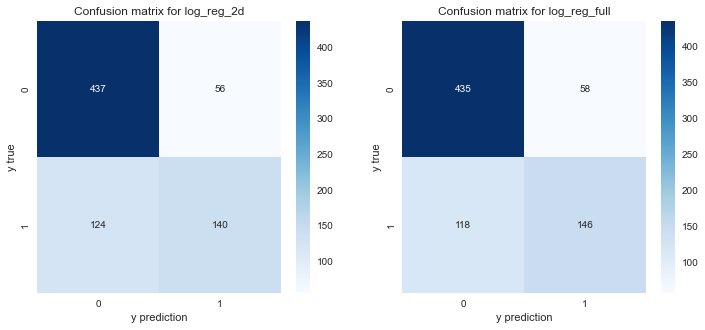

In [25]:
#Строим матрицы ошибок для каждой из моделей
confusion_matrix1 = metrics.confusion_matrix(y, y_pred1)
confusion_matrix2 = metrics.confusion_matrix(y, y_pred2)
#Визуализируем матрицы ошибок
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #фигура + 2 координатные плоскости
#Строим тепловую карту для первой матрицы ошибок
sns.heatmap(confusion_matrix1, annot=True, fmt='', ax=axes[0], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[0].set_title('Confusion matrix for log_reg_2d')
axes[0].set_xlabel('y prediction')
axes[0].set_ylabel('y true')
#Строим тепловую карту для второй матрицы ошибок
sns.heatmap(confusion_matrix2, annot=True, fmt='', ax=axes[1], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[1].set_title('Confusion matrix for log_reg_full')
axes[1].set_xlabel('y prediction')
axes[1].set_ylabel('y true');

Видно, что матрицы ошибок незначительно отличаются по своим составляющим. На их основе можно вручную вычислить остальные метрики для каждой из моделей, но мы воспользуемся встроенными функциями.
Расчёт метрик для модели `log_reg_2d`, обученной на двух факторах — `Glucose` и `BMI`:

In [26]:
#Модель log_reg_2d:
#Рассчитываем accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, y_pred1)))
#Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y, y_pred1)))
#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y, y_pred1)))
#Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y, y_pred1)))

Accuracy: 0.76
Precision: 0.71
Recall: 0.53
F1 score: 0.61


In [27]:
#Модель log_reg_full:
#Рассчитываем accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, y_pred2)))
#Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y, y_pred2)))
#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y, y_pred2)))
#Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y, y_pred2)))

Accuracy: 0.77
Precision: 0.72
Recall: 0.55
F1 score: 0.62


А теперь давайте сравним:

* `Accuracy`: доля правильных ответов для первой модели составляет `0.76`, для второй — `0.77`.
* `Precision`: способность первой модели отделять больных диабетом пациентов от здоровых пациентов составляет `0.71`, а второй — `0.72`.
* `Recall`: обобщающая способность находить больных пациентов среди всех пациентов для первой модели — `0.53`, а для второй — `0.56`.
* `F1`: среднее гармоническое между `precision` и `recall` для первой модели составляет `0.61`, а для второй — `0.63`.

>Видно, что хоть и с небольшим отрывом, но вторая модель, обученная по всем признакам, превосходит первую модель по всем метрикам.

Для облегчения расчёта метрик можно использовать функцию `classification_report()` из модуля `metrics`. Она возвращает отчёт обо всех метриках классификации:

In [28]:
print(metrics.classification_report(y, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       493
           1       0.72      0.55      0.62       264

    accuracy                           0.77       757
   macro avg       0.75      0.72      0.73       757
weighted avg       0.76      0.77      0.76       757



**Что здесь отображено?**

1. В первой части таблицы отображаются метрики `precision`, `recall` и `f1-score`, рассчитанные для каждого класса в отдельности. Столбец `support` — это количество объектов каждого из классов.
2. Во второй части таблицы отображена общая метрика accuracy. 
3. Далее идёт строка `macro avg` — это среднее значение метрики между классами 1 и 0. Например, значение в строке `macro avg` и столбце `recall = (0.88 + 0.56)/2=0.72`.
4. Завершает отчёт строка `weighted avg` — это средневзвешенное значение метрики между классами 1 и 0. Рассчитывается по формуле:

`score_weighted_avg = 0.998 * score_class_0 + 0.002 * score_class_1`

Ранее мы говорили о метриках `precision`, `recall` и  только в контексте класса 1 (болеет диабетом). В отчёте `classification_report()` эти метрики рассчитаны и для класса 0. Смысл остаётся тем же, просто замените в рассуждениях класс 1 на класс 0.

Представим ситуацию, что дополнительная диагностика диабета в нашей клинике довольно дорогая. Но при этом нам важно выявить диабет у как можно большего числа людей. То есть нам важен и `precision`, и `recall`.

При этом наш `recall` равен 0.56, то есть мы находим только 56 % больных диабетом пациентов среди всех болеющих диабетом. Согласитесь, не очень хороший показатель (чуть выше половины). Можем ли мы его как-то улучшить?

Давайте будем изменять порог принятия решений. Сейчас порог составляет 0.5: то есть если вероятность наличия диабета у пациента выше 0.5, то модель относит его к больным диабетом, а если меньше 0.5 — к здоровым.

Но как будут меняться значения метрик `recall`, `precision` и `F1`, если мы попробуем изменить порог вероятности, например на 0.4, 0.3 или 0.6? Давайте проследим за этим.

>**Примечание**. Геометрически регулировка порога вероятности для логистической регрессии означает движение разделяющей плоскости.

Сделаем предсказание вероятности наличия диабета моделью `log_reg_full` для каждого пациента из нашей выборки. Затем создадим несколько различных порогов вероятности в диапазоне от 0.1 до 1 с шагом 0.05. В цикле будем определять класс пациента при различных порогах вероятности. В конце рассчитаем метрики.

In [29]:
#Считаем вероятности наличия диабета для каждого из пациентов
#Нас интересует только вероятность класса (второй столбец)
y_proba_pred = log_reg_full.predict_proba(diabetes_data.drop('Outcome', axis=1))[:, 1]
#Для удобства завернём numpy-массив в Pandas Series
y_proba_pred = pd.Series(y_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #Пациентов, для которых вероятность наличия диабета > threshold, относим к классу 1
    #В противном случае — к классу 0
    y_pred = y_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y, y_pred))
    precision_scores.append(metrics.precision_score(y, y_pred))
    f1_scores.append(metrics.f1_score(y, y_pred))

Теперь у нас есть три списка (`recall_scores`, `precision_scores` и `f1_scores`), в которых хранятся значения метрик при различных значениях порога вероятности .

Давайте построим графики зависимости метрик от порога вероятности:

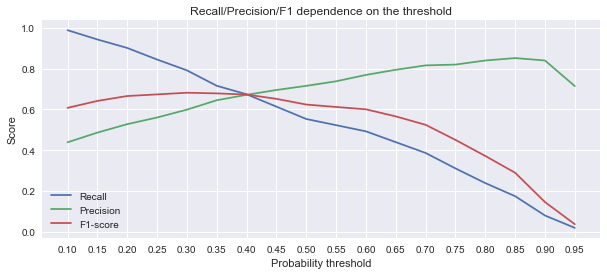

In [30]:
#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')
#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
 
#Даём графику название и подписываем оси
ax.set_title('Recall/Precision/F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds) 
#Отображаем легенду
ax.legend();

>Что мы видим на графике?
>
>С увеличением вероятностного порога повышается `precision` и падает `recall`. Очевидно, что с увеличением порога вероятности мы начинаем классифицировать как диабетиков только тех пациентов, в диагнозе которых мы хорошо уверены, то есть мы повышаем точность (`precision`), но при этом мы отсекаем пациентов, которые больны, но модель выдаёт низкую вероятность болезни, то есть мы уменьшаем охват (`recall`).
>
>При этом значение `F1`-меры сначала немного повышается, а затем неуклонно падает.
>
>Интересной является точка `threshold=0.4`, где происходит пересечение всех трёх графиков. Это точка равенства `precision` и `recall` и, как следует из формулы, равенства `F1`-меры.
>
>Однако максимум `F1`-меры достигается в другой точке — `threshold=0.35`. При этом значения `recall` и `precision` в этой точке различны: `recall` выше, а вот `precision` ниже.
>
>Перед нами стоит выбор, что для нас все таки важнее: `precision`, `recall` или их равенство. Давайте сделаем выбор в пользу равенства `precision` и `recall`, оно достигается при threshold=0.4.

Как теперь мы можем сделать предсказание класса, обладая данной информацией?

Мы делаем предсказание вероятности наличия диабета для всех пациентов, а затем вручную определяем всех пациентов, у которых эта вероятность > 0.4, в класс 1, а остальных — в класс 0. Далее считаем метрики:

In [31]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.4
#Пациентов, для которых вероятность наличия диабета > 0.4, относим к классу 1
#В противном случае — к классу 0
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y, y_pred_opt))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       493
           1       0.67      0.67      0.67       264

    accuracy                           0.77       757
   macro avg       0.75      0.75      0.75       757
weighted avg       0.77      0.77      0.77       757



In [32]:
print(metrics.classification_report([0, 0, 1, 1, 1, 1, 0, 1], [0, 1, 0, 0, 1, 1, 0, 1]))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.75      0.60      0.67         5

    accuracy                           0.62         8
   macro avg       0.62      0.63      0.62         8
weighted avg       0.66      0.62      0.63         8



# 3.2 Мультиклассовая классификация <a class="anchor" id=3-2></a>

[к содержанию](#0)

>Ранее мы с вами рассмотрели основы бинарной классификации. Но что делать, когда классов, на которые необходимо разделить данные, больше 2? Например, классификация автомобилей по различным маркам или определение национальности по фотографии и т. д.

В таком случае используется очень простой подход, который называется «`один против всех`» (`one-vs-over`).

>Идея этого подхода очень простая. Если у нас есть `k` различных классов (`k > 2`), давайте обучим `k` классификаторов, каждый из которых будет предсказывать вероятности принадлежности каждого объекта к определённому классу.

Например, у нас есть три класса, обозначенные как 0, 1 и 2. Тогда мы обучаем три классификатора: первый из них учится отличать класс 0 от классов 1 и 2, второй — класс 1 от классов 0 и 2, а третий — класс 2 от классов 1 и 0. Таким образом, класс, на который «заточен» классификатор, мы обозначаем как 1, а остальные классы — как 0.

Когда каждая из трёх моделей сделает предсказание вероятностей для объекта, итоговый классификатор будет выдавать класс, который соответствует самой «уверенной» модели.

Схематично это можно представить следующим образом:

<img src=ml3_img24.png>

Если мы используем в качестве классификатора логистическую регрессию и количество факторов равно двум (`x1` и `x2`), то можно изобразить тепловую карту вероятностей принадлежности к каждому из классов в каждой точке пространства, а также разделяющие плоскости, которые образуются при пороге вероятности в 0.5. 

<img src=ml3_img25.png>

На тепловых картах каждый класс обозначен своим цветом: 0 — зелёным, 1 — жёлтым, 2 — синим. Чем ярче цвет, тем выше вероятность принадлежности к каждому к классу в этой области пространства.

В результате у нас получится три различных пространства вероятностей, что-то вроде трёх параллельных реальностей. Чтобы собрать всё это воедино, мы выбираем в каждой точке пространства максимум из вероятностей. Получим следующую картину:

<img src=ml3_img26.png>

Модель логистической регрессии легко обобщается на случай мультиклассовой классификации. Пусть мы построили несколько разделяющих плоскостей с различными наборами параметров `k`, где `k` — номер классификатора. То есть имеем `K` разделяющих плоскостей:

<img src=ml3_img27.png>

# 3.3 Мультиклассовая классификация на python <a class="anchor" id=3-3></a>

[к содержанию](#0)

Давайте посмотрим, как логистическая регрессия решает задачу мультиклассовой классификации. 

Возьмём датасет о пингвинах из библиотеки `seaborn`:

In [36]:
penguins_data = pd.read_csv('penguins.csv')
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Описание данных:

* `species` — класс пингвина ('Adelie', 'Chinstrap', 'Gentoo'), целевой признак;
* `island` — остров, на котором живёт пингвин ('Torgersen', 'Biscoe', 'Dream');
* `bill_length_mm` — длина клюва в миллиметрах;
* `bill_depth_mm` — толщина клюва в миллиметрах;
* `flipper_length_mm` — длина крыльев;
* `body_mass_g` — масса;
* `sex` — пол ('Male', 'Female').

Наша цель — предсказать класс пингвина.

Очевидно, что классификация является мультиклассовой, так как возможных значений три.

Для начала давайте посмотрим на пропуски в данных:

In [37]:
penguins_data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Итак, в некоторых столбцах есть пропуски.

Логистическая регрессия — модель, которая не умеет работать с пропусками. Чтобы не получить ошибку, необходимо произвести предварительную предобработку. Для простоты давайте удалим все строки, содержащие пропуски в данных:

In [38]:
penguins_data = penguins_data.dropna()

Теперь, когда пропусков в данных больше нет, разделим набор данных на матрицу наблюдений `X` и столбец с ответами `y`.

In [39]:
X = penguins_data.drop('species', axis=1)
y = penguins_data['species']
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE


Данные содержат строковые категориальные столбцы — `island` и `sex`. Логистическая регрессия не умеет работать со строковыми значениями. Необходимо произвести кодирование категориальных признаков. 

Примечание. Кодировать целевую переменную y не нужно, даже если она представлена в виде строковых значений. Это не влияет на работу модели.

Воспользуемся функцией `get_dummies()` из библиотеки `pandas` для произведения «горячего» кодирования.

In [40]:
X_dummies = pd.get_dummies(X)
X_dummies.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,1


Теперь данные готовы для подачи в модель.

Создаём модель логистической регрессии, значение параметра `multi_class` выставляем на '`multinomial`' (мультиклассовая классификация), `max_iter` — на `1000` (для обеспечения сходимости), `random_state=42`.

Затем обучим модель с помощью метода `fit()` и сделаем предсказание вероятностей принадлежности к каждому из классов с помощью метода `predict_proba()` и самих классов — с помощью метода `predict()`. Вероятности округлим до второго знака после запятой.

In [41]:
#Создаём объект класса LogisticRegression
log_reg = linear_model.LogisticRegression(
    multi_class='multinomial', #мультиклассовая классификация
    max_iter=1000, #количество итераций, выделенных на сходимость
    random_state=42 #генерация случайных чисел
)
 
#Обучаем модель 
log_reg.fit(X_dummies, y)
#Делаем предсказание вероятностей
y_pred_proba = np.round(log_reg.predict_proba(X_dummies), 2)
#Делаем предсказание класса
y_pred = log_reg.predict(X_dummies)

Для наглядности создадим таблицу из вероятностей для каждого класса и финального предсказания. Выберем пять случайных строк из этой таблицы с помощью метода [sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html):

In [42]:
#Создаём DataFrame из вероятностей
y_pred_proba_df = pd.DataFrame(
    y_pred_proba, 
    columns=['Adelie', 'Chinstrap', 'Gentoo']
)
#Создаём DataFrame из предсказанных классов
y_pred_df = pd.DataFrame(
    y_pred, 
    columns=['Predicted Class']
)
#Объединяем таблицы по вертикальной оси
y_df = pd.concat([y_pred_proba_df, y_pred_df], axis=1)
#Выбираем пять случайных строк
y_df.sample(5, random_state=2)

,Adelie,Chinstrap,Gentoo,Predicted Class
277,0.00,0.00,1.0,Gentoo
223,0.00,0.00,1.0,Gentoo
7,0.79,0.21,0.0,Adelie
160,0.00,1.00,0.0,Chinstrap
65,1.00,0.00,0.0,Adelie


Из таблицы можно проследить, как происходит предсказание класса пингвина на основе полученных вероятностей. Видно, что выбирается класс, вероятность принадлежности к которому максимальна.

Например, для строки под номером 7 логистическая регрессия предсказала три вероятности: `0.79` — вероятность принадлежности к классу `Adelie`, `0.21` — к классу `Chinstrap` и `0` — к классу `Gentoo`. На основе этих вероятностей было сделано предсказание и модель отнесла пингвина в строке `7` к классу `Adelie`.

Вот так и происходит мультиклассовая классификация. 

Давайте посмотрим, как в таком случае будет выглядеть отчёт о метриках:

In [43]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       146
   Chinstrap       1.00      1.00      1.00        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



Для мультиклассовой классификации к отчёту просто добавляется новая строка, соответствующая третьему классу. 

Из отчёта видно, что наша модель идеально решила задачу классификации (**все метрики равны 1**), то есть классы оказались линейно разделимыми.

### ДОСТОИНСТВА И НЕДОСТАТКИ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ 

Давайте обобщим всё вышесказанное и приведём достоинства и недостатки логистической регрессии.

# `+`
* Простой, интерпретируемый, но в то же время эффективный алгоритм. Благодаря этому он очень популярен в мире машинного обучения.
* Поиск параметров линейный или квадратичный (в зависимости от метода оптимизации), то есть ресурсозатратность алгоритма очень низкая.
* Не требует подбора внешних параметров (гиперпараметров), так как практически не зависит от них.

# `-`
* Алгоритм работает хорошо, только когда классы линейно разделимы, что в реальных задачах бывает очень редко. Поэтому обычно данная модель используется в качестве `baseline`.

В завершение изучения логистической регрессии можно добавить, что недостаток с линейной разделимостью классов можно побороть с помощью введения полиномиальных признаков, тем самым снизив смещение модели. Тогда логистическая регрессия вместо разделяющей плоскости будет означать выгнутую разделяющую поверхность сложной структуры.

Однако мы знаем, что с этим трюком стоит быть аккуратным, так как можно получить переобученную модель. Поэтому в комбинации с полиномиальными признаками стоит подобрать наилучший параметр регуляризации.

<img src=ml3_img28.png>

>На рисунке выше изображены три различные модели:
>
>`первая` — простая логистическая регрессия;
>
>`вторая` — логистическая регрессия, обученная на полиномиальных признаках второй степени;
>
>`третья` — логистическая регрессия, обученная на полиномиальных признаках десятой степени.
>
>Видно, что первая модель обладает низким качеством и не обобщает общей зависимости (у неё высокое смещение). Третья же, напротив, идеально выделяет каждое наблюдение в правильный класс, но является переобученной и также не отражает общей зависимости (у неё высокий разброс). Оптимальной моделью является вторая, которая не подстраивается под индивидуальные наблюдения и отражает общую зависимость в данных.

# 4. Логическия регрессия. Практика <a class="anchor" id=4></a>

[к содержанию](#0)

Вы уже знакомились с этой задачей в модуле по визуализации и провели небольшое исследование данных. В этом модуле мы построим классификатор, который позволит своевременно определять уходящих клиентов банка.

Для начала импортируем библиотеки, которые нам понадобятся:

In [44]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn.model_selection import train_test_split #разделение выборки
from sklearn import preprocessing #предобработка
%matplotlib inline
plt.style.use('seaborn')

In [45]:
churn_data = pd.read_csv('churn.zip')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Напомним значения столбцов:

* `RowNumber` — номер строки таблицы;
* `CustomerId` — идентификатор клиента;
* `Surname` — фамилия клиента;
* `CreditScore` — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);
* `Geography` — страна проживания клиента (банк межнациональный);
* `Gender` — пол клиента;
* `Age` — возраст клиента;
* `Tenure` — сколько лет клиент пользуется банком;
* `Balance` — сколько у клиента денег на счетах в банке;
* `NumOfProduct` — число услуг банка, которые приобрёл клиент;
* `HasCrCard` — есть ли у клиента кредитная карта (1 — да, 0 — нет);
* `IsActiveMember` — есть ли у клиента статус активного участника банка (1 — да, 0 — нет);
* `EstimatedSalary` — предполагаемая заработная плата клиента;
* `Exited` — статус ушедшего (1 — ушедший клиент, 0 — лояльный клиент).

В модуле по визуализации мы выяснили, что отток клиентов в Германии, Франции и Испании имеет различные показатели. Исследователи, которые уже работали с этим датасетом, пришли к выводу, что наилучшее решение при работе с этими данными — строить модели индивидуально для каждой страны. Мы будем прогнозировать отток в немецком филиале банка. Давайте выделим только данные, относящиеся к Германии:

In [46]:
churn_data = churn_data[churn_data['Geography'] == 'Germany']
churn_data.shape

(2509, 14)

Сразу избавимся от заведомо неинформативных признаков: страна, номер строки, идентификатор пользователя и имя клиента.

In [47]:
churn_data = churn_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


In [48]:
churn_data.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Давайте расширим наш датасет с помощью методов `Feature Engineering`. Создадим следующие признаки:

* `BalanceSalaryRatio` — отношение баланса на счетах к заработной плате клиента;
* `TenureByAge` — отношение времени пользования банком к возрасту клиента;
* `CreditScoreGivenAge` — отношение кредитного рейтинга к возрасту клиента.

In [49]:
churn_data['BalanceSalaryRatio'] = churn_data['Balance']/churn_data['EstimatedSalary']
churn_data['TenureByAge'] = churn_data['Tenure']/(churn_data['Age'])
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore']/(churn_data['Age'])

Также перекодируем единственный текстовый категориальный признак Gender в бинарный столбец (1 — 'Male', 0 — 'Female'):

In [50]:
churn_data['Gender'] = churn_data['Gender'].apply(lambda x: 1 if x=='Male' else 0)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
15,616,1,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889
16,653,1,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621
26,756,1,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000
28,574,0,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837


In [51]:
# Разделим набор данных на матрицу наблюдений X и столбец ответов y:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

In [52]:
# Проведём нормализацию матрицы наблюдений X:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

Прежде чем перейти к этапу разделения выборки на тренировочную и тестовую, посмотрим на сбалансированность данных. Для этого воспользуемся методом `value_counts()` и выведем количество наблюдений каждого из классов в долевом соотношении от общего количества наблюдений:

In [53]:
y.value_counts(normalize=True)

0    0.675568
1    0.324432
Name: Exited, dtype: float64

Очевидно, что наши классы не сбалансированы. Ушедших пользователей — `32 %`, в то время как лояльных — `68 %`. 

В чём может быть проблема? 

При разделении нашего набора данных на тренировочный и тестовый может возникнуть такая ситуация, что в тренировочную выборку попадут только лояльные клиенты или их большая часть. Тогда модель может **не научиться определять вероятность оттока** и качество на тестовой выборке будет оставлять желать лучшего.

Или противоположная ситуация: в тестовую выборку попадут только лояльные клиенты. Тогда модель будет показывать прекрасное качество на тестовой выборке, но в реальных условиях она может оказаться **бесполезной**.

То есть нам нужно сделать так, чтобы в тренировочной и тестовой выборках было одинаковое соотношение лояльных и ушедших клиентов. Такое разбиение выборки называется стратифицированным. 

Как хорошо, что функция `train_test_split()` из библиотеки `sklearn` умеет производить такое разбиение! Для этого в функции предусмотрен параметр `stratify`, который нужно выставить в значение признака. Признак должен иметь одинаковые соотношения в тренировочной и тестовой выборках. У нас этим признаком является целевой признак `y`.

Выполним разбиение, установив значением параметра `random_state` число 0:

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=0)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


In [55]:
# Проверим, что число лояльных и ушедших клиентов примерно одинаково в каждой из выборок:
print('Train :', y_train.value_counts(normalize=True))
print('\n')
print('Test :', y_test.value_counts(normalize=True))

Train : 0    0.675704
1    0.324296
Name: Exited, dtype: float64


Test : 0    0.675159
1    0.324841
Name: Exited, dtype: float64


In [83]:
#Создаем объект класса логистическая регрессия
log_reg_full = linear_model.LogisticRegression(solver='sag', random_state=42, max_iter=1000)
#Обучаем модель, минизируя logloss
log_reg_full.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='sag')

In [84]:
y_train_pred = log_reg_full.predict(X_train)
y_test_pred = log_reg_full.predict(X_test)

In [85]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       424
           1       0.63      0.38      0.47       204

    accuracy                           0.72       628
   macro avg       0.69      0.63      0.64       628
weighted avg       0.71      0.72      0.70       628



In [86]:
print('F1 train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
print('F1 test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

F1 train: 0.49
F1 test: 0.47


In [87]:
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test)
#Выводим результирующие размерности таблиц
print(X_train_poly.shape)
print(X_test_poly.shape)

(1881, 454)
(628, 454)


In [112]:
#Обучаем модель, минизируя logloss
log_poly = linear_model.LogisticRegression(solver='sag', random_state=42, max_iter=1000)
log_poly.fit(X_train_poly, y_train)
y_train_pred_poly = log_poly.predict(X_train_poly)
y_test_pred_poly = log_poly.predict(X_test_poly)

In [113]:
print('F1 train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred_poly)))
print('F1 test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred_poly)))

F1 train: 0.66
F1 test: 0.64


In [115]:
#Считаем вероятности наличия диабета для каждого из пациентов
#Нас интересует только вероятность класса (второй столбец)
y_proba_pred = log_poly.predict_proba(X_test_poly)[:, 1]
#Для удобства завернем numpy-массив в pandas Series
y_proba_pred = pd.Series(y_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #Пациентов, для которых вероятность наличия диабета > threshold относим к классу 1
    #В противном случае - к классу 0
    y_pred = y_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_test, y_pred))
    precision_scores.append(metrics.precision_score(y_test, y_pred))
    f1_scores.append(metrics.f1_score(y_test, y_pred))

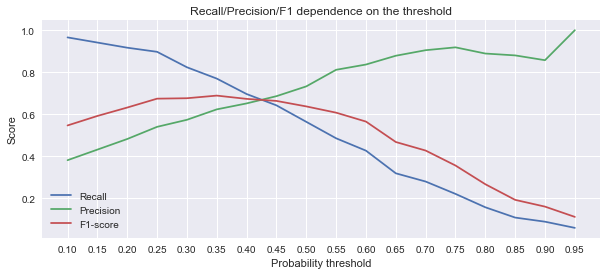

In [116]:
#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')
#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')

#Даем графику название и подписи осям
ax.set_title('Recall/Precision/F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds) 
#Отображаем легенду
ax.legend();

In [ ]:
#Задаем оптимальный порог вероятностей (по метрике F1)
threshold_opt = 0.35
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)

In [117]:
#Задаем оптимальный порог вероятностей
threshold_opt = 0.35
#Пациентов, для которых вероятность наличия диабета > 0.4 относим к классу 1
#В противном случае - к классу 0
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y_test, y_pred_opt))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82       424
           1       0.62      0.77      0.69       204

    accuracy                           0.77       628
   macro avg       0.75      0.77      0.76       628
weighted avg       0.79      0.77      0.78       628



# 5. Деревья решений <a class="anchor" id=5></a>

[к содержанию](#0)

В этом юните мы познакомимся с ещё одним семейством моделей машинного обучения — `деревьями решений`. Для начала поговорим о том, что такое дерево решений и как с его помощью решают задачу классификации.

**Деревья решений** являются одним из наиболее понятных человеку и в то же время мощных алгоритмов принятия решений. К тому же на их основе строятся самые эффективные ансамблевые модели машинного обучения, такие как **случайный лес**, о котором мы поговорим далее.

Алгоритмы на основе деревьев решений могут использоваться как для решения задач классификации, так и для регрессии. В этом модуле мы разберём задачу классификации, а в дальнейшем, когда будем разбирать математическую составляющую алгоритмов, поговорим о том, как научить дерево решать задачу регрессии.

Если коротко, решающее дерево предсказывает значение целевой переменной с помощью применения последовательности простых решающих правил. Этот процесс в некотором смысле согласуется с естественным для человека процессом принятия решений.

## ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ДЕРЕВЕ РЕШЕНИЙ

Начнём сразу с примера.

Представьте, что у вас есть автомобиль, который вы решили застраховать. Вы приходите в страховую компанию, где вам дают заполнить анкету. По этой анкете сотрудник страховой компании будет принимать решение, стоит ли выдавать вам страховку.

Сотрудник в свою очередь будет руководствоваться примерно следующим регламентом:

* Если возраст владельца > 40 лет, то:
* * Если место эксплуатации автомобиля — город , то:
* * * Если стаж > 10 лет, то:
>Застраховать.
* * * Если стаж < 10 лет, то:
>Не страховать.
* * Если место эксплуатации автомобиля — сельская местность, то:
> Застраховать.
* Если возраст владельца ≤ 40 лет, то:
* * Если аварий не было зафиксировано, то:
>Застраховать.
* * Если были аварии, то:
* * * Если тип автомобиля — минивэн, то:
>Застраховать.
* * * Если тип автомобиля — спорткар, то:
>Не страховать.

То есть сотрудник при принятии решения использует информацию, предоставленную вами в анкете, и подает её на вход вложенного условного оператора.

Для простоты восприятия можно представить такой подход визуально в виде следующего дерева:

<img src=ml3_img29.png>

Аналогичным образом работает и алгоритм машинного обучения под названием «**дерево решений**» (`Decision Tree`). 

Если дерево уже обучено, то есть уже сформулированы условия в прямоугольниках, то, когда в страховую компанию придёт новый автовладелец, сотруднику будет достаточно прогнать данные клиента через дерево решений и таким образом принять решение, то есть произвести классификацию.

Вот ещё один пример дерева решений. Большинство из нас когда-нибудь играли в игру «Слова на лбу» или «Тарантинки». На лоб каждого из игроков приклеивается бумажка с написанным на ней словом. Игрок может задавать другим игрокам вопросы о загаданном ему предмете/животном/человеке и т. д. Другие игроки могут отвечать на вопросы только «Да» и «Нет». Цель — за минимальное количество вопросов догадаться, о чём идёт речь.

Логика `«если …, то …»` используется людьми повседневно и поэтому интуитивно понятна каждому из нас. На основании этих рассуждений можно построить мощный алгоритм машинного обучения.

Деревья решений находят своё применение во множестве прикладных задач.

>Успешнее всего деревья применяют в следующих областях:
>
>* **Банковское дело**. Оценка кредитоспособности клиентов банка при выдаче кредитов.
>* **Промышленность**. Контроль качества продукции (обнаружение дефектов в готовых товарах), испытания без нарушений (например, проверка качества сварки) и т. п.
>* **Медицина**. Диагностика заболеваний разной сложности.
>* **Молекулярная биология**. Анализ строения аминокислот.
>* **Торговля**. Классификация клиентов и товара.

Теперь перейдём к формальной части. Нам важно уже сейчас познакомиться с терминологией деревьев решений, чтобы понять общий принцип их обучения.

Пусть у нас есть всё та же матрица наблюдений `X`, в которой содержатся наблюдения и характеризующие их признаки (привычный нам `DataFrame`), и правильные ответы `y` — метки классов. 

Дадим определение дереву решений и его составляющим ↓

Формально структура дерева решений — это `связный ациклический граф.` Что это значит?

`Граф` — это абстрактная топологическая модель, которая состоит из вершин и соединяющих их рёбер.

`Связный граф` — это граф, в котором между любой парой существует направленная связь.

`Ациклический граф` — это граф, в котором отсутствуют циклы, то есть в графе не существует такого пути, по которому можно вернуться в начальную вершину.

<img src=ml3_img30.png>

**Примечание**. Рекомендуем вам запомнить данное лаконичное определение дерева — так вы сможете показать свой уровень знаний перед будущим работодателем.

В дереве решений можно выделить **три типа вершин**:

<img src=ml3_img31.png>

**Корневая вершина** (`root node`) — то, откуда всё начинается. Это первый и самый главный вопрос, который дерево задаёт объекту. В примере со страхованием это был вопрос «Возраст автовладельца > 40».
**Внутренние вершины** (`intermediate nodes`) — это дополнительные уточняющие вопросы, которые дерево задаёт объекту. 
**Листья** (`leafs`) — конечные вершины дерева. Это вершины, в которых содержится конечный «ответ» — класс объекта.
Максимально возможная длина **от корня до самых дальних листьев** (не включая корневую) называется **максимальной глубиной дерева** (`max depth`).

Во внутренней или корневой вершине признак проверяется на некий логический критерий, по результатам которого мы движемся всё глубже по дереву. Например, «Количество кредитов  1». 

Логический критерий, который находится в каждой вершине, называется предикатом, или решающим правилом.

На самом деле все предикаты — это просто взятие порога по значению какого-то признака. Формально это записывается следующим образом:

<img src=ml3_img32.png>

>**Примечание**. В зависимости от реализации предикат может быть с условием <= или <= . В реализации `sklearn` используется условие <=. Но вы можете встретить другую формулировку предикатов в иных реализациях или в литературе.

Если результат предиката равен 1, то мы переходим по левой ветви дерева к следующему узлу, в противном случае — по правой ветви дерева к следующему узлу.

А что насчёт геометрии?

Каждый новый вопрос дерева решений при его обучении разбивает пространство признаков на две части: в первую часть отправляются наблюдения, для которых предикат истинен, а во вторую — для которых он ложен.

>Посмотрим, как это будет выглядеть, на примере. 
>
>Вам уже знакома задача классификации про ирисы. Ирисы Фишера — это задача, на которой Рональд Фишер ещё в 1936 году (почти 100 лет назад!) продемонстрировал работу алгоритма, разделяющего ирисы на сорта в зависимости от параметров долей околоцветника.
>
>Пусть у нас есть следующие признаки:
>
>* длина внутренней доли околоцветника (англ. petal length);
>* ширина внутренней доли околоцветника (англ. petal width).
>
>На основании этих двух признаков требуется разделить ирисы на три сорта:
>
>* ирис щетинистый (Iris Setosa);
>* ирис виргинский (Iris virginica);
>* ирис разноцветный (Iris versicolor).
>
>Пусть мы обучили на этих данных дерево решений с максимальной глубиной 1. Оно получилось вот таким:

<img src=ml3_img33.png width=600>

В каждом блоке указаны следующие данные:

* Предикат `I(x_j <= t)` — условие, по которому выборка делится на две части: на ту, для которой условие выполняется, и ту, для которой не выполняется.
* `gini` — критерий информативности Джини, о котором мы поговорим чуть позже.
* `samples` — количество объектов, которые мы проверяем на данном шаге.
* `value` — распределение по классам для объектов, которые мы проверяем на данном шаге: например value=[0, 50, 50] означает, что на текущем этапе разделения в выборке находится 0 объектов класса setosa и по 50 объектов классов versicolor и virginica.
* `class` — класс, который мы присваиваем, если завершим выполнение алгоритма на данном шаге.

А вот так будет выглядеть наш процесс разделения цветов на классы:

<img src=ml3_img34.png width=600>

## Как происходит построение разделяющих плоскостей?

### **Глубина дерева = 0.**

Дерево задаёт первый вопрос: `pental lentgh <= 2.45`. Это выражение соответствует вертикальной прямой, которая делит пространство на две части по признаку `petal length`.

* В левую часть пространства попали 50 наблюдений. Это только жёлтые точки пространства — цветы setosa. Значит, дальнейшее разделение не имеет смысла.

* В правую часть пространства попали 100 наблюдений. Это и синие, и зелёные объекты классов versicolor и virginica. Значит, нужно попробовать задать ещё одно решающее правило.

### **Глубина дерева = 1.**

Дерево задаёт второй вопрос: `pental width <= 1.75`. Это выражение соответствует горизонтальной прямой, которая делит оставшееся после прошлого разделения пространство на две части по признаку petal width.

* В нижнюю (синюю) часть этого пространства попали 54 наблюдения. Из них 49 цветов класса versicolor и 5 цветов класса virginica.

**Максимальная глубина достигнута**. В полученной части пространства преобладает класс versicolor, значит все наблюдения, которые находятся в этой части, дерево будет относить к классу versicolor.

* В верхнюю (зелёную) часть этого пространства попали 46 наблюдений. Из них 1 цветок класса versicolor и 45 цветов класса virginica.

**Максимальная глубина достигнута**. В полученной части пространства преобладает класс virginica, значит все наблюдения, которые находятся в этой части, дерево будет относить к классу virginica.

>Отметим, что деление пространства можно продолжать до тех пор, пока пространство не будет разделено так, чтобы верно выделить каждый из классов. 
>
>Кстати, для каждой области можно подсчитать вероятность каждого из классов. Это просто отношение количества объектов -класса, которые попали в лист дерева, к общему количеству объектов в листе.
>
>Например, для синей области вероятности будут равны:
>
>`P_(класс=setosa) = 0 / 54 = 0`
>
>`P_(класс=setosa) = 5 / 54 = 0.09`
>
>`P_(класс=setosa) = 49 / 54 = 0.81`

# 5.1 Процесс построения дерева решений <a class="anchor" id=5-1></a>

[к содержанию](#0)

Существует множество [стратегий](https://scikit-learn.ru/1-10-decision-trees/#tree-algorithms-id3-c4-5-c5-0-and-cart) построения деревьев решений. Мы рассмотрим стратегию, реализованную в библиотеке `sklearn`, — алгоритм `CART` (`Classification and Regression Tree`), который предназначен для построения бинарных деревьев решений (деревьев, у которых каждая вершина связана с двумя другими вершинами нижнего уровня). Данный алгоритм, как следует из его названия, предназначен для решения задач классификации и регрессии.

Внимательный студент уже заметил, что построение дерева решений **можно описать рекурсией**. Каждая вершина дерева порождает две других вершины, а они в свою очередь порождают новые вершины, и так происходит до тех пор, пока не выполнится некоторый критерий остановки, например в вершине не останутся только наблюдения определённого класса.

>**Примечание**. Если вы забыли, что такое рекурсия, рекомендуем вам вернуться к [модулю по продвинутому использованию функций](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DSPR-2.0+14JULY2021/jump_to_id/298afb4ea6634ec1bc86c4ac7b2a080e) и активировать рекурсивное мышление, оно нам понадобится.

Пусть у нас есть матрица наблюдений `X` и столбец с ответами — метками классов `y`. На основе примеров и ответов мы хотим построить дерево решений, которое будет производить классификацию.

Итак, псевдокод рекурсивной функции для построения решающего дерева будет выглядеть следующим образом (запускать код не нужно, так как он является абстрактным):

In [118]:
def build_decision_tree(X, y):
    node = Node()
    if stopping_criterion(X, y) is True:
        node = create_leaf_with_prediction(y)
        return node 
    else:
        X_left, y_left, X_rigth, y_rigth = best_split(X, y)
        node.left = build_decision_tree(X_left, y_left)
        node.right = build_decision_tree(X_rigth, y_rigth)

## ПОИСК ПАРАМЕТРОВ ДЕРЕВА РЕШЕНИЙ

>Обратите внимание, что внутренние параметры дерева решений кардинально отличаются от линейных моделей.

В линейных моделях мы пытались найти такие коэффициенты в уравнениях, при которых наблюдался минимум функции потерь.

В деревьях же мы пытаемся выбрать такие признаки  и их пороговые значения , при которых произойдёт разделение набора на две части по какому-то критерию наилучшим образом. В нашем псевдокоде этот процесс организован в виде функции `best_split()`.

>Важно понимать, что дерево решений — это топологический алгоритм, а не аналитический, то есть структуру дерева не получится описать в виде формулы, как те же линейные модели. Поэтому про стандартные методы оптимизации, такие как градиентный спуск или тем более метод наименьших квадратов, можно забыть. 

Чтобы интуитивно понять, как организуется поиск параметров, вспомним про игру «Слова на лбу».

Пусть один человек загадывает знаменитость, а второй пытается отгадать, задавая только вопросы, на которые можно ответить «Да» или «Нет» (опустим варианты «не знаю» и «не могу сказать»).

Какой вопрос отгадывающий задаст первым делом? Конечно, такой, который лучше всего уменьшит количество оставшихся вариантов.

К примеру, вопрос «Это Анджелина Джоли?» в случае отрицательного ответа оставит более 7.5 миллиардов вариантов для дальнейшего перебора (строго говоря, поменьше, ведь не каждый человек — знаменитость, но всё равно немало), а вот вопрос «Это женщина?» отсечёт уже около половины знаменитостей.

То есть, признак пол намного лучше разделяет выборку людей, чем признак это Анджелина Джоли, национальность — испанец или любит футбол.

Интуитивно это соответствует уменьшению некоторой неопределённости, или, иначе говоря, повышению прироста информативности.

В случае «угадайки» знаменитостей критериев отбора может быть бесчисленное количество. Но когда мы работаем с набором данных, у нас ограниченное количество признаков и для них есть ограниченное количество порогов. Тогда мы можем полным перебором найти такую комбинацию  и , которая обеспечит наилучшее уменьшение неопределённости.

Неопределённость можно измерять различными способами, в деревьях решений для этого используются `энтропия Шеннона` и `критерий Джини`. Мы подробно обсудим их реализацию в модулях по математике.

# 5.2 Деревья решений в `sklearn` <a class="anchor" id=5-2></a>

[к содержанию](#0)

# 6. Введение в ансамбли: бэггинг. Случайные лес <a class="anchor" id=6></a>

[к содержанию](#0)

# 7. Деревья решений и случайный лес. Практика <a class="anchor" id=7></a>

[к содержанию](#0)

# 8. Итоги <a class="anchor" id=8></a>

[к содержанию](#0)